# Hashing & their Time complexity

- These are Sets and Dictionaries in Python
- Hashmaps only con is it doesn’t maintain keys in an order
- so we need to sort it first and then itterate for sequential ordering

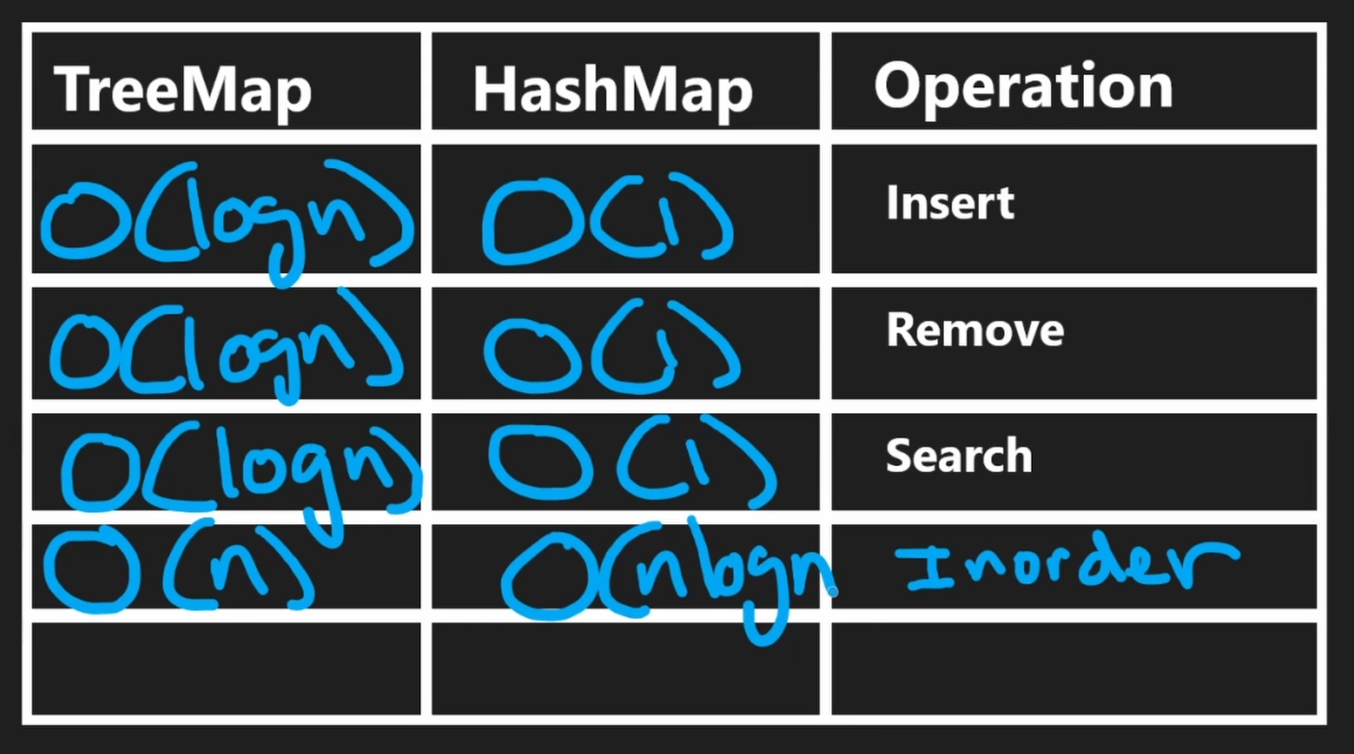

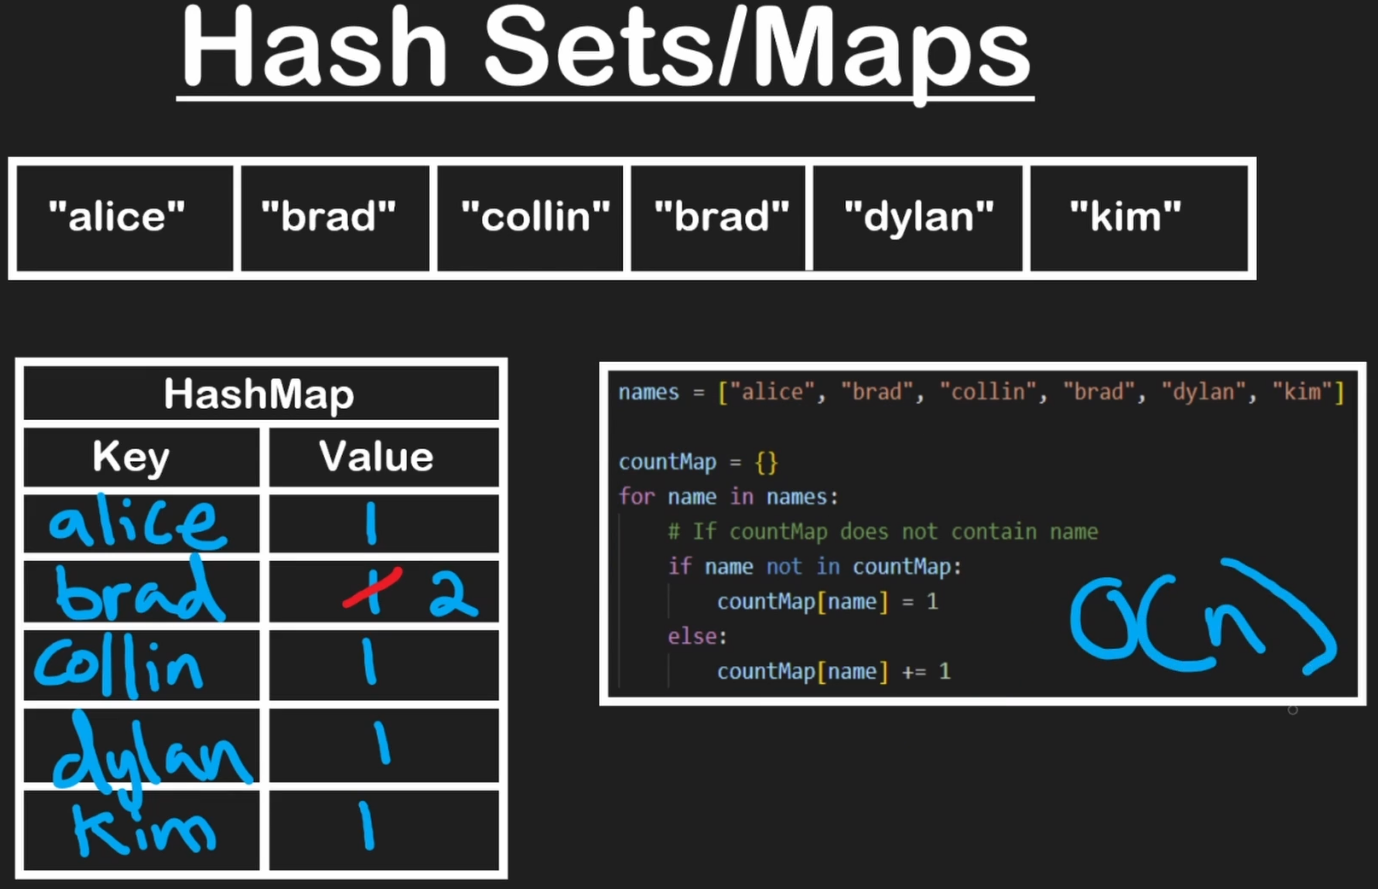

In [2]:
names = ["alice","brad","collin","brad","dylan","kim"]
countdict = {}
for i in names:
    if i not in countdict:
        countdict[i] = 1
    else:
        countdict[i] +=1

print(countdict)
    

{'alice': 1, 'brad': 2, 'collin': 1, 'dylan': 1, 'kim': 1}


In [7]:
pip install sortedcontainers

  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
# If sorted dictionary is required then we can use the SortedDict from python 3.7x and above
# pip install sortedcontainers
from sortedcontainers import SortedDict

student_scores = SortedDict({
    'Alice': 88,
    'Bob': 95,
    'Charlie': 75
})

# Retrieve students in ascending order of their scores
for student, score in student_scores.items():
    print(f"{student}: {score}")

'''
 Output:
 Charlie: 75
 Alice: 88
 Bob: 95
'''

Alice: 88
Bob: 95
Charlie: 75


'\n Output:\n Charlie: 75\n Alice: 88\n Bob: 95\n'

In [8]:
'''
https://leetcode.com/problems/contains-duplicate/
https://www.youtube.com/watch?v=3OamzN90kPg
Time = O(n), Space = O(n) '''
nums = [1,2,3,1]
class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        hashset = set()
        for n in nums:
            if n in hashset:
                return True
            hashset.add(n)
        return False
'''
nums =[1,2,3,1]
Output : true
Expected : true '''
        
        
        
 '''
 https://leetcode.com/problems/two-sum/description/
 https://www.youtube.com/watch?v=KLlXCFG5TnA&list=PLot-Xpze53ldVwtstag2TL4HQhAnC8ATf&index=1
 Time= O(N), Space= O(N)
 '''
nums = [2,7,11,15], target = 9
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        prevmap={}
        for i,n in enumerate(nums):
            diff = target-n
            if diff in prevmap:
                return [prevmap[diff],i]
            prevmap[n]=i
        return []


'''
nums = [2,7,11,15]
target = 9
Output = [0,1]
Expected = [0,1]  '''

'''
for 1st iteration, i=0, n=2
diff = 9 - 2 = 7 & diff in prevmap is empty for 1st iteration. so it goes to prev[n] = i
prevmap[2] = 0  # prevmap = {2: 0} which is like for 0th index we add 2 in prevmap

for 2nd iteration,, i=1, n=7
diff = 9 - 7 = 2
if diff in prevmap:  # Check if 2 is in prevmap & is available
prevmap[2]  # This will return 0, because `2` was stored in `prevmap` at index 0
return [prevmap[diff], i]  # This will return [prevmap[2], 1] => [0, 1]
'''




'''
https://leetcode.com/problems/lru-cache/
https://www.youtube.com/watch?v=7ABFKPK2hD4
T- O(1) for put and get, S-O(n)
'''
# optimal way using doubly linked lists
class Node:
    def __init__(self, key, val):
        self.key, self.val = key, val
        self.prev = self.next = None

class LRUCache:
    def __init__(self, capacity: int):
        self.cap = capacity
        self.cache = {}                                        # map key to node(creating a hashmap/dict)
        self.left, self.right = Node(0,0), Node(0,0)            # creating left,right empty nodes helps as pointers where left = least recently used(LRU) and right = most recently used (MRU)
        self.left.next, self.right.prev = self.right, self.left  #connecting those left and right pointers as doubly linked list
    
    # remove node at LRU
    def remove(self, node):
        prev, nxt = node.prev, node.next     # we take the given node's prev & next nodes
        prev.next, nxt.prev = nxt, prev      # and connecting prev to nxt nodes, which automatically removes the node
    
    # insert node at right most which is MRU
    def insert(self, node):
        prev, nxt = self.right.prev, self.right     # curr node will be node, so its prev is back of right, node next is right node
        prev.next = nxt.prev = node         # connecting prev, nxt to node
        node.prev, node.next = prev, nxt    # connecting node to prev, nxt

    def get(self, key: int) -> int:
        if key in self.cache:
            self.remove(self.cache[key])    # to update the MRU we need to delete that existing one
            self.insert(self.cache[key])    # and add MRU 
            return self.cache[key].val
        return -1

    def put(self, key: int, value: int) -> None:
        if key in self.cache:
            self.remove(self.cache[key])    # if key already present we will remove that
        self.cache[key] = Node(key, value)  # creating new node and pointing it to cache
        self.insert(self.cache[key])        # inserting that value 

        if len(self.cache) > self.cap:      # we have fixed capacity so validating that
            lru = self.left.next            # get the lru
            self.remove(lru)                # remove lru
            del self.cache[lru.key]         # deleting that from cache


# Your LRUCache object will be instantiated and called as such:
# obj = LRUCache(capacity)
# param_1 = obj.get(key)
# obj.put(key,value)



## Brute force T- O(n) for put and get, S-O(n)
class LRUCache:

    def __init__(self, capacity: int):
        self.cache = []
        self.capacity = capacity

    def get(self, key: int) -> int:
        for i in range(len(self.cache)):
            if self.cache[i][0] == key:
                tmp = self.cache.pop(i)
                self.cache.append(tmp)
                return tmp[1]
        return -1

    def put(self, key: int, value: int) -> None:
        for i in range(len(self.cache)):
            if self.cache[i][0] == key:
                tmp = self.cache.pop(i)
                tmp[1] = value
                self.cache.append(tmp)
                return

        if self.capacity == len(self.cache):
            self.cache.pop(0)
            
        self.cache.append([key, value])


# Implimenting Hash Sets/Maps

### What is hashing and how using which data structure we impliment

- In Python, hash sets and hash maps refer to data structures that store elements using hashing to ensure fast lookups, insertions, and deletions.
- sets handles unordered and unique data without duplicates & checks existance of element
- dictionaries(maps) handles in key,value pairs, <python 3.7 used to have unordered data but later it is based on insertion order & helps to find element based on the given key


### Why we use hashing

- insertion, deletions, lookups are O(1) time complexity on average 
- Hashing achieves this by using a hash function, which converts data (like a string or number) into a fixed-size integer value (called a hash code). This hash code is then used to index the data in a hash table, where the actual element or key-value pair is stored.
- O(n) time complexity if hash collisions happen i.e, poorly designed hash funciton generate too many collisions by causing elements to cluster in same few buckets

### Approach to solve arised problems

- Inorder to overcome we resize the table by doubling it when ever inserting elements fills nearly half of table then recompute hashing keys for existing elements
- Despite doing this if collision happends again we fallow Open_Addressing or Sperate_Chaining methods to avoid risk of collision
- Still there are may techniques but we fallow this for time being

- Open Addressing :
    - LINEAR PROBING = after hash is computer if there exists an element we increment hash index by 1 for next location until we find an desire index if empty for insertion,  searching for lookups/deletion
    - Can Lead to clustering and future collisions as sequence of slots are used
    - QUADRATIC PROBING = same as linear probing but hash index is squared to clear above challenge
    - Saves memory as everything lies on same hash table itself but performance degrades since need to search many slots if table becomes too full
- Seperate Chaining: 
    - If it gets same hash index then linked list or binary search tree kind of ds is created and multiple elements of same hasing index is appended to that data structure(ds)
    - Reduces clustering as they dont collide with other elements of hash table and no need to resize table frequently
    - If lot of collisions happen then that ds grows and increase time complexity to O(n) to search desired element inside it

- Open Addressing: O(n) if the table is almost full or clustering occurs.
- Separate Chaining: O(n) if all elements hash to the same bucket (very rare with a good hash function).


Which to Use?

- OPEN ADDRESSING tends to use less memory, as it stores all elements in the hash table itself. It's useful when the hash table is sparsely populated.
- SEPERATE CHAINING is often preferred when the hash table is expected to have many elements or frequent collisions, as it handles collisions more gracefully.

# Hashing implimentation

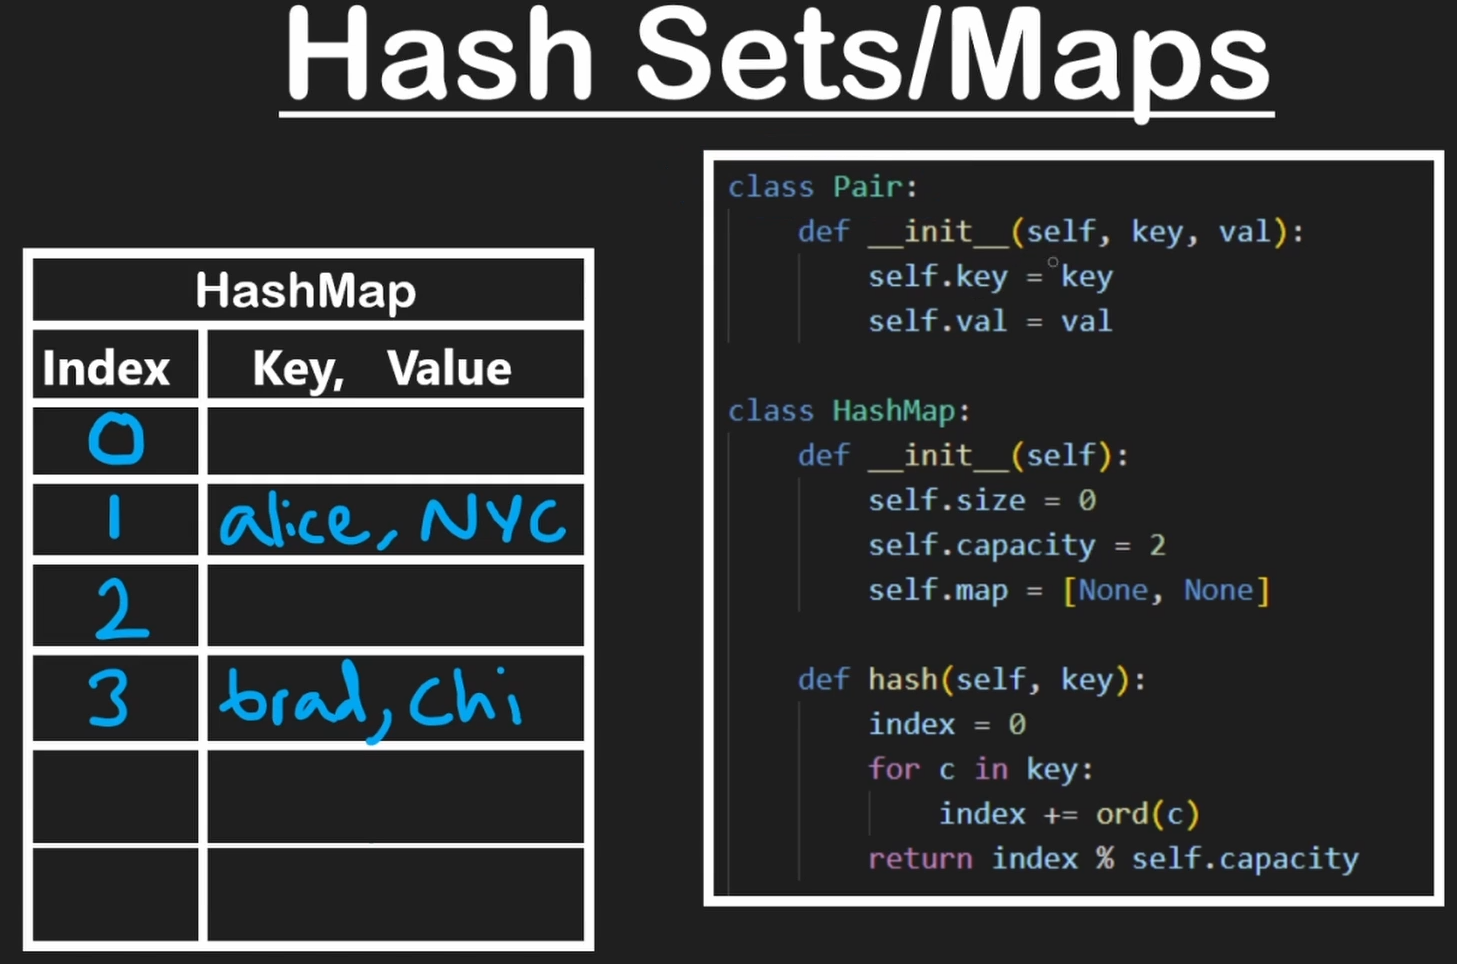

- Pair:
    - __init__(self,key,value) = initializing key,value pair
- HashMap:
    - __init__(self) = defining an empty dictionary with size 0 and capacity(memory) as 2. as it is empty self.map = [None, None]
    - __hash__(self,key) = starting hashmap index = 0 we are interating and adding-up key elements into unitcode by changing element to unitcode by ord(c). Finally returing __index % self.capacity__ which gives index value among the capacity range to store the elements inside that index using as hased_index 

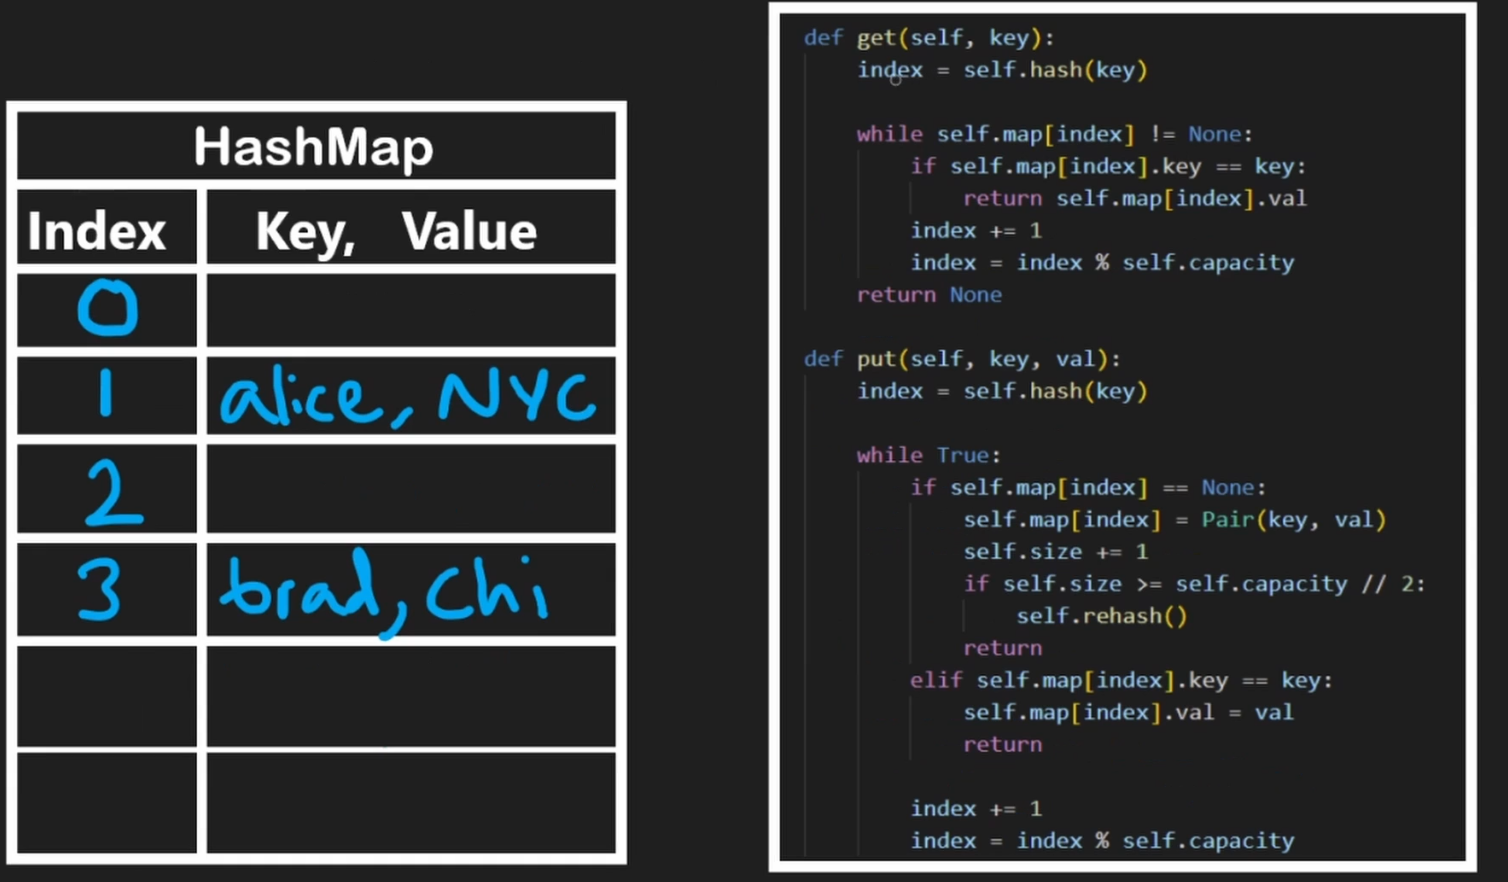

- __get(self,key)__ = first gets the index of hashed key using previous hash funciton from HashMap class
    - if __index != None__ i.e., if there exists an element next checking if the reqired elements key are same and then returning the value if there doesnt exit we check for next available index by incrementing its value i.e., __index += 1__
    - suppose there is no next avaliable index due to capacity and checking out of bound for index then to bring back to initial index we calculate index(hash value) again i.e., __index % self.capacity__ like this we try to seach intire hash_table

- __put(self,key,value)__ = creates the hash key to store these values inside that index using __hash(key)__ function
    - inside loop at anytime they can return anything so we are giving __while True__. 
    - checking if index place is empty by if_none then places the key,value inside that index
    - in else condition if index is not empty and already exists the key required then overwrites the value 
    - if both cases are not applicable then increments the index and re-calculates index value, now checks if none(empty) puts elements there and increases size. here if size > capacity then we rehash it as fallows and then returns data


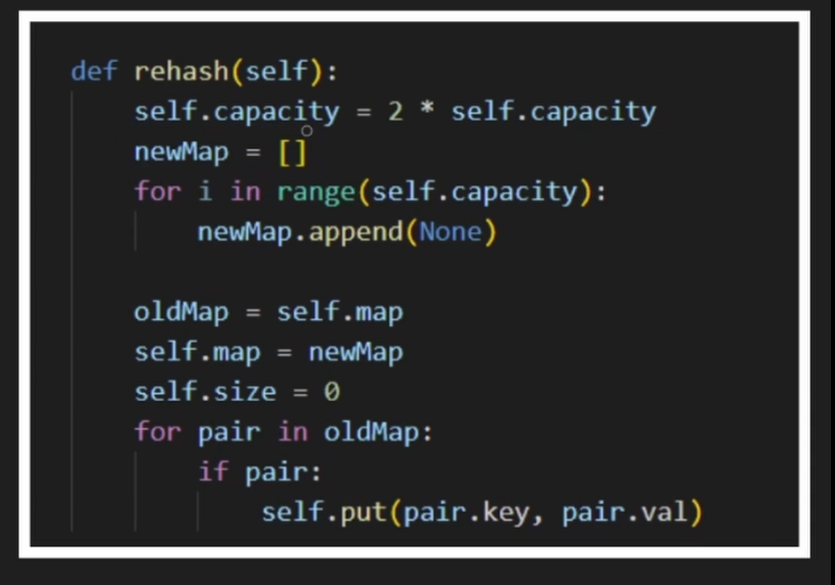

- __rehash(self)__ = 2x existing capacity, creates a new dictionary/map and make sure it is null using for loop as mentioned above
- assigns existing __map(self.map)__ to __oldMap__ variable, so __self.Map__ is empty
- now assigns the __newMap__ to __self.map__ so new map capacity with null value becomes existing map then makes it size to zero
- now loops the existing __oldMap__ data and check if there is __pair__. if available uses __self.put__ to add pairs into increased capacity __self.map(newMap)__

Finally this is the way we impliment the hashset/map

In [ ]:
'''
https://leetcode.com/problems/valid-anagram/
https://www.youtube.com/watch?v=9UtInBqnCgA
'''
# Time complexity = O(n) , Space complexity = O(n)
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:

        # checking length of both strings are same or not
        if len(s) != len(t):       
            return False

        # creating an empty dictionary for both the strings
        CountS , CountT = {},{}


        #looping through length of string and counts the characters repeatitiveness
        for i in range(len(s)):
            CountS[s[i]] = 1+ CountS.get(s[i],0)          # if we give 1+ the count starts from 1 else starts from 0
            CountT[t[i]] = 1+ CountT.get(t[i],0)          # we use .get cuz if the character is found it adds count 1 else count would be 0
        

        # here we check the count values of keys available in both the dictionaries
        for c in CountS:
            if CountS[c] != CountT.get(c,0):
                return False
        return True


# Time complexity = O(n) , Space complexity = O(n)
from collections import Counter

def isAnagram(s: str, t: str) -> bool:
    # Step 1: Check if both strings have the same length
    if len(s) != len(t):
        return False
    
    # Step 2: Compare the frequency of characters in both strings
    return Counter(s) == Counter(t)



# Time complexity = O(nlogn) , Space complexity = O(1)(based on sorting algo used) and less effecient as compared to above two solutions
def isAnagram(s: str, t: str) -> bool:
    # Step 1: Check if both strings have the same length
    if len(s) != len(t):
        return False
    
    # Step 2: Sort both strings and compare
    return sorted(s) == sorted(t)


        

In [ ]:
'''
https://leetcode.com/problems/group-anagrams/description/
https://www.youtube.com/watch?v=vzdNOK2oB2E
1 way = take each string & sort them but time complexity would we O(m.n.logn) where n = length of string & m = number of strings which is high
effecient way = counting a-z letters form each string, so that count would be the key and same counts of key strings would be the values
Time complexity = O(m*n*26) = O(m*n) where m = total no.of imput strings & n is number of characters inside string & 26 would be count of
a-z alphabets
'''





'''
Input: strs = ["eat","tea","tan","ate","nat","bat"]
Output: [["bat"],["nat","tan"],["ate","eat","tea"]]
'''